In [1]:
%matplotlib inline

In [2]:
import numpy as np 

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
import matplotlib
from matplotlib import pyplot as plt

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
from divers import plot_confusion_matrix

In [7]:
import numpy as np
import sys
sys.path.append('./sompyLatmos/')     # Chemin du package
from sompy import SOMFactory
from sompy import SOMData


### Classification : Application des cartes topologiques à l’étude des évènements El Niño

**Avant de s'intéresser à l'apprentissage des cartes topologique une étude préliminaire et approfondie du jeu de données est nécessaire.**    
**Il sera aussi important de comprendre à quoi correspond le phénomène [El Niño](https://fr.wikipedia.org/wiki/El_Ni%C3%B1o).**    
El Niño est un phénomène météorologique qui se présente périodiquement dans la planète dans l'océan Pacifique équatorial et qui affecte le climat global. Différents signaux révèlent la présence de ce phénomène tel qu’une forte variation de la température à la surface de la mer. Le vent est un des facteurs physiques qui peuvent causer ces variations de température. La force du vent crée une tension en surface qui se traduit en un changement de température.

### Chargement et mise en forme des données

**Importation des données**    
On importe le fichier de données.

In [8]:
mat = np.loadtxt('el_nino.data')
Iok  = np.where(mat[:,1] != -9999)[0]
mat = mat[Iok,:]
mat[0,:]= mat[0,:].astype(int)

In [9]:
annee=(mat[:,0]/100).astype(int)
mois=mat[:,0]%100
tmp=np.concatenate((annee[:,np.newaxis], mois[:,np.newaxis]), axis=1)
data=np.concatenate((tmp,mat), axis=1)
if True : # False: # 
    comp_names = ['annee','mois','anneemois','SST1','SST2','SST3','SST4','Tx1','Tx2','Tx3','Tx4','Ty1','Ty2','Ty3','Ty4']
    masque=np.zeros(len(comp_names))
    masque[3]=1               # on n'apprend que sur les 4 SST
    masque[4]=1
    masque[5]=1
    masque[6]=1
elif False: # True: # 
    data=data[:,3:7]
    data[0,:] = [0.47,0.06,0.02,0.24]
    comp_names = ['SST1','SST2','SST3','SST4']
    masque=None
else:
    data = data[300:328,3:7]
    comp_names = ['SST1','SST2','SST3','SST4']
    masque=None

def get_index_positions(list_of_elems, element):
    ''' Returns the indexes of all occurrences of give element in
    the list- listOfElements '''
    index_pos_list = []
    for i in range(len(list_of_elems)):
        if list_of_elems[i] == element:
            index_pos_list.append(i)
    return index_pos_list

**Détermination d'étiquettes**

In [10]:
Inino = get_index_positions(annee,72)
Inino.extend(get_index_positions(annee,83))

# Labellisation "Non Nino" ou "Nino"
data_labels_num = np.empty(data.shape[0]).astype(int)
data_labels_num[:] = 0; # Initialisation : "Non Nino"
for i in Inino :
    data_labels_num[i] = 1
classnames = ['!Nino','Nino']
data_labels = np.array([classnames[c] for c in data_labels_num])

**Création d'un objet sData**

In [11]:
sData = SOMData(data,      # les données 
                comp_names,# les noms des variables
                data_labels,# les potentielles étiquettes 
                normalization = "var")

**Affichage des T-SNE**

In [12]:
#sData.plot_tsne()

### Création de la carte et apprentissage

#### Création d'une carte topologique (objet sm)

In [13]:
#mapsize=(10,1)
mapsize=(7,7)
#mapsize=(3,7)
sm = SOMFactory().build(sData, 
                        mapsize=mapsize, 
                        normalization = None, 
                        initialization='pca', 
                        radius_train ='linear', 
                        name='El nino', 
                        lattice='hexa', 
                        #lattice='rect', 
                        mask=masque, 
                        components_to_plot=((0,1),(0,2),(0,3)))

#### Entraînement de la carte

Training ...
 Rough training...
radius_ini: 5.000 , radius_final: 1.000, trainlen: 30

Epoch : 0 qErr : 0.7466  tErr : 0.4665
Epoch : 1 qErr : 0.7238  tErr : 0.4634
Epoch : 2 qErr : 0.7207  tErr : 0.4604
Epoch : 3 qErr : 0.7172  tErr : 0.4634
Epoch : 4 qErr : 0.7137  tErr : 0.4604
Epoch : 5 qErr : 0.7103  tErr : 0.4604
Epoch : 6 qErr : 0.7063  tErr : 0.4665
Epoch : 7 qErr : 0.7021  tErr : 0.4726
Epoch : 8 qErr : 0.6980  tErr : 0.4787
Epoch : 9 qErr : 0.6934  tErr : 0.4817
Epoch : 10 qErr : 0.6888  tErr : 0.4878
Epoch : 11 qErr : 0.6839  tErr : 0.4909
Epoch : 12 qErr : 0.6789  tErr : 0.4970
Epoch : 13 qErr : 0.6738  tErr : 0.4909
Epoch : 14 qErr : 0.6687  tErr : 0.5061
Epoch : 15 qErr : 0.6637  tErr : 0.5122
Epoch : 16 qErr : 0.6584  tErr : 0.5152
Epoch : 17 qErr : 0.6527  tErr : 0.5244
Epoch : 18 qErr : 0.6475  tErr : 0.5244
Epoch : 19 qErr : 0.6421  tErr : 0.5305
Epoch : 20 qErr : 0.6363  tErr : 0.5305
Epoch : 21 qErr : 0.6299  tErr : 0.5244
Epoch : 22 qErr : 0.6237  tErr : 0.5335
Epo

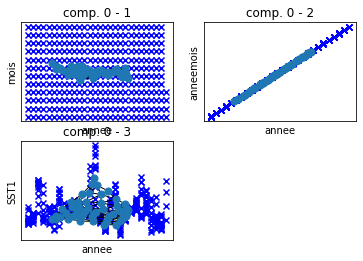

Finetune training
radius_ini: 1.250 , radius_final: 0.300, trainlen: 50

Epoch : 0 qErr : 0.5948  tErr : 0.5335
Epoch : 1 qErr : 0.5935  tErr : 0.5335
Epoch : 2 qErr : 0.5928  tErr : 0.5366
Epoch : 3 qErr : 0.5918  tErr : 0.5457
Epoch : 4 qErr : 0.5911  tErr : 0.5549
Epoch : 5 qErr : 0.5902  tErr : 0.5610
Epoch : 6 qErr : 0.5890  tErr : 0.5549
Epoch : 7 qErr : 0.5880  tErr : 0.5579
Epoch : 8 qErr : 0.5875  tErr : 0.5518
Epoch : 9 qErr : 0.5866  tErr : 0.5457
Epoch : 10 qErr : 0.5855  tErr : 0.5427
Epoch : 11 qErr : 0.5847  tErr : 0.5427
Epoch : 12 qErr : 0.5835  tErr : 0.5366
Epoch : 13 qErr : 0.5827  tErr : 0.5305
Epoch : 14 qErr : 0.5817  tErr : 0.5305
Epoch : 15 qErr : 0.5809  tErr : 0.5244
Epoch : 16 qErr : 0.5796  tErr : 0.5244
Epoch : 17 qErr : 0.5786  tErr : 0.5183
Epoch : 18 qErr : 0.5772  tErr : 0.5183
Epoch : 19 qErr : 0.5766  tErr : 0.5244
Epoch : 20 qErr : 0.5748  tErr : 0.5213
Epoch : 21 qErr : 0.5727  tErr : 0.5183
Epoch : 22 qErr : 0.5713  tErr : 0.5244
Epoch : 23 qErr :

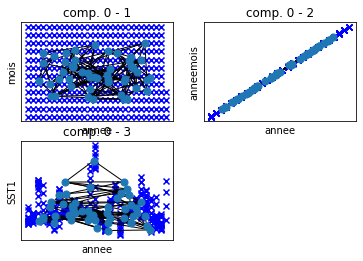

In [14]:
sm.train(n_job=1, 
         verbose=None, 
         train_rough_len=30, 
         train_rough_radiusin=5, 
         train_rough_radiusfin=1,
         train_finetune_len=50, 
         train_finetune_radiusin=1.25, 
         train_finetune_radiusfin=0.3,
         watch_evolution = False)

**Affichage des T-SNE**

In [15]:
#sm.plot_tsne()

#### Autres affichages graphiques :

* **L'intégralité des variables/dimensions**

<Figure size 432x288 with 0 Axes>

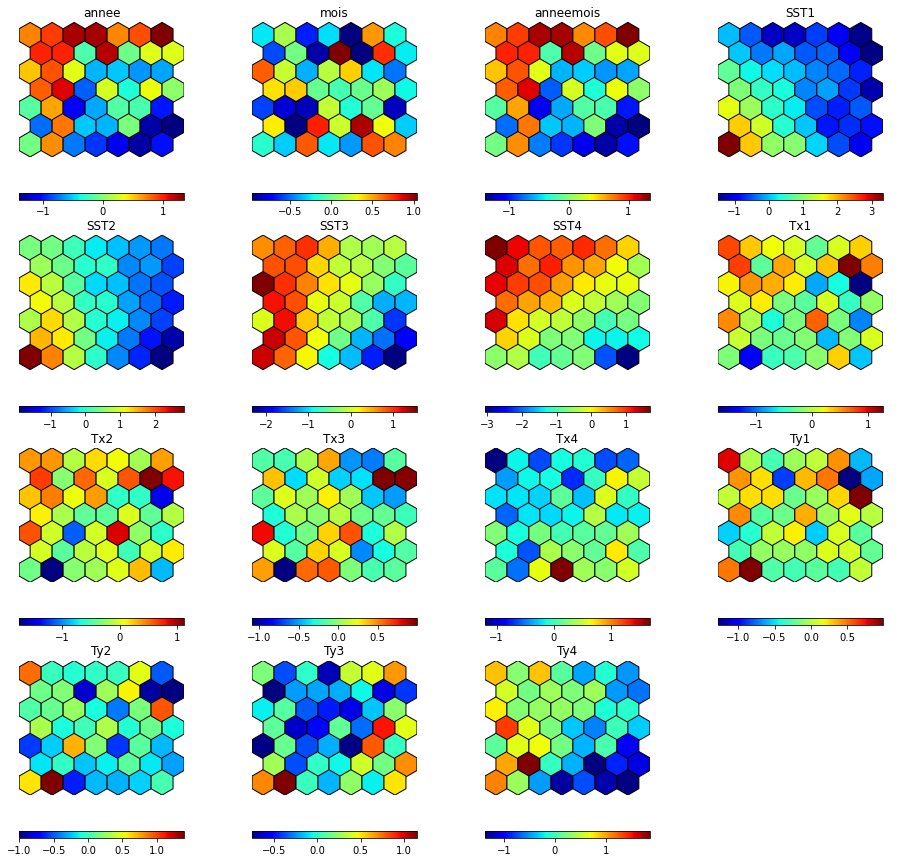

In [16]:
from mapview import View2D
dim = sData._dim
col_sz = 4
view2D  = View2D(16,4*(dim/col_sz),
                 "El nino",
                 text_size=10)
view2D.show(sm, col_sz=col_sz, which_dim="all", denormalize=True) ; 

* **Les variables apprises**

<Figure size 432x288 with 0 Axes>

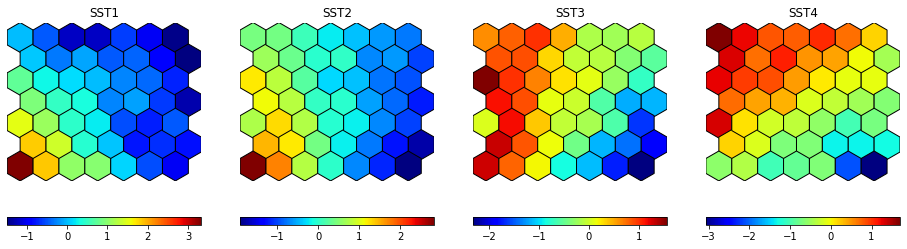

In [17]:
view2D  = View2D(16,16*((masque==1).sum()/col_sz),
                 "El nino",
                 text_size=10)
view2D.show(sm, col_sz=col_sz, which_dim=np.where(masque==1)[0], denormalize=True) ; 

* **Les variables non apprises**

<Figure size 432x288 with 0 Axes>

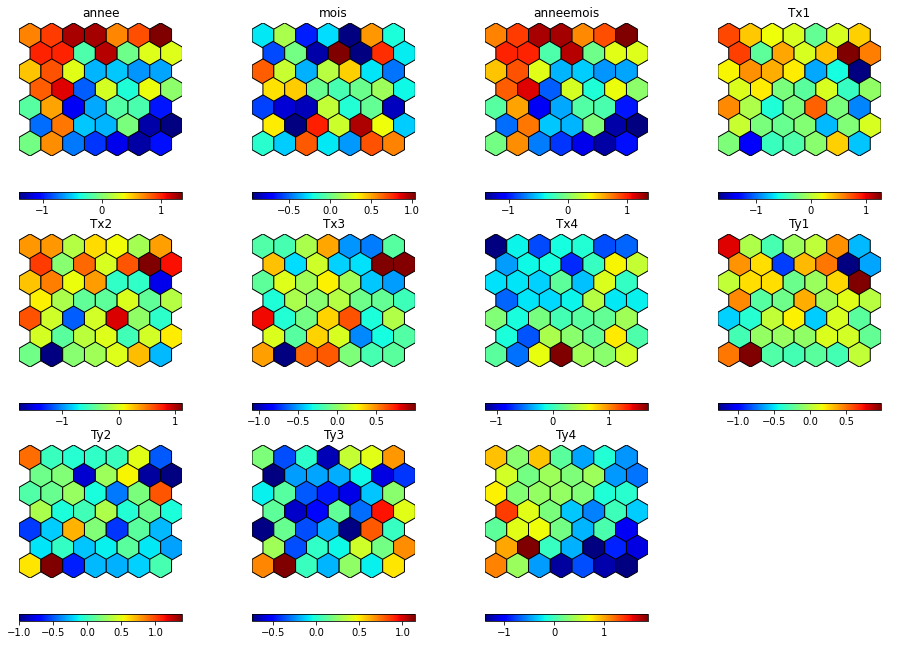

In [18]:
view2D  = View2D(16,4*(masque==0).sum()/col_sz,
                 "El nino",
                 text_size=10)
view2D.show(sm, col_sz=col_sz, which_dim=np.where(masque==0)[0], denormalize=True) ; 

 - **Affichage de la carte avec etiquettes (les indices des neurones)**

In [19]:
lesDimensions = np.where(masque==1)[0]
leNombreDesDimension = len(lesDimensions)

<Figure size 432x288 with 0 Axes>

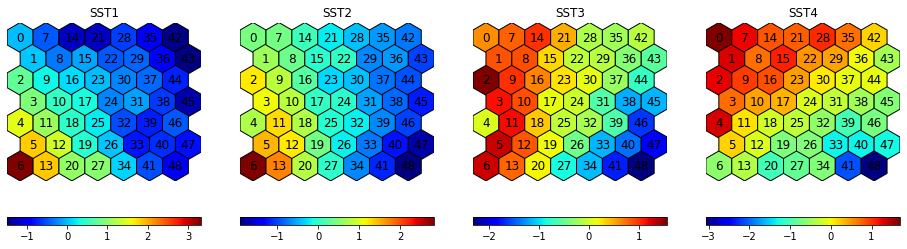

In [20]:
view2D  = View2D(16,10,
                 "El nino",
                 text_size=10) ;
view2D.show(sm, neuronLabels=None,anotate=True, col_sz=leNombreDesDimension, which_dim=lesDimensions, denormalize=True, labelsize=12) ; 

 - **Affichage de la carte avec les cardinalités**

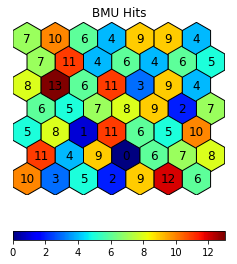

In [21]:
from bmuhits import BmuHitsView
vhts  = BmuHitsView(4,4,"Hits Map",text_size=10)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, logaritmic=False)

 - **Affichage de la carte (distances entre les référents/neurones)**

([],
 array([[0.02451612, 0.05732977, 0.07888675, 0.07649183, 0.06007104,
         0.05437039, 0.04459724],
        [0.07230322, 0.09292854, 0.11104344, 0.09439687, 0.07981513,
         0.08439865, 0.05293521],
        [0.04190886, 0.05954114, 0.05409007, 0.05562547, 0.04669638,
         0.04746447, 0.0420128 ],
        [0.05724187, 0.07219334, 0.07350115, 0.05609662, 0.06947305,
         0.06286636, 0.03688318],
        [0.1050976 , 0.1205081 , 0.11812242, 0.08781889, 0.10219841,
         0.11291935, 0.09264987],
        [0.07126581, 0.08287013, 0.07823617, 0.07355965, 0.08267695,
         0.06277499, 0.0354674 ],
        [0.03927576, 0.07158411, 0.05992493, 0.05148374, 0.06040514,
         0.06675673, 0.03021876]]))

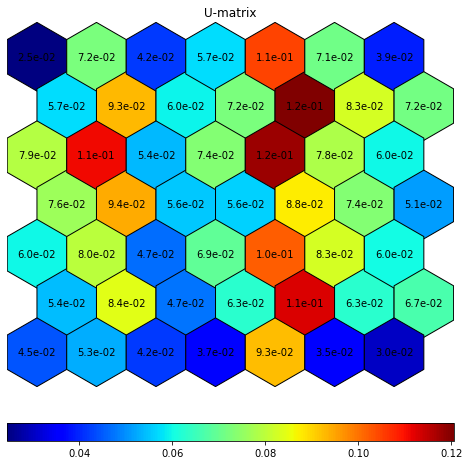

In [22]:
from umatrix import UMatrixView
umat = UMatrixView(8,8,"Unified Distance Matrix", text_size=14)
umat.show(sm)

#### Evaluer l'apprentissage de la carte
 * **Calcul des erreurs globales**

In [23]:
topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error  = %s\nQuantization error = %s" % (topographic_error, quantization_error))

Topographic error  = 0.524390243902439
Quantization error = 0.5050596232217799


 * **Coefficient de Silhouette**
(Pour cette partie on pourra voir la définition du [coefficient de Silhouette](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) sur wikipedia ainsi que la documentation sur le site de scikit learn pour laquelle il y a un [tutoriel sur kmoyennes et silouhette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html))    
En partitionnement de données (clustering), le coefficient de silhouette est une mesure de qualité d'une partition d'un ensemble de données en classification automatique. Pour chaque point, son coefficient de silhouette est la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation). Si cette différence est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. A l'inverse, si cette différence est positive, le point est en moyenne plus proche de son groupe que du groupe voisin : il est donc bien classé.

Le coefficient de silhouette proprement dit est la moyenne du coefficient de silhouette pour tous les points. 

In [24]:
# sm._bmu = sm._bmu[0].astype(int)

In [25]:
silhouette_avg = silhouette_score(sm._data, sm._bmu[0].astype(int))
silhouette_avg

-0.10983189861220816

In [26]:
sample_silhouette_values = coefficientSilhouette = silhouette_samples(sData._data, sm._bmu[0].astype(int))
# sample_silhouette_values

#### Labellisation des neurones référents à partir des labels des données

In [27]:
sm.node_labels_from_data(sData)

In [28]:
neuron_labels = np.array(sm.node_labels)
print(neuron_labels)

['!Nino' '!Nino' '!Nino' '!Nino' 'Nino' 'Nino' 'Nino' '!Nino' '!Nino'
 '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino'
 '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' 'Nan'
 '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino'
 '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino' '!Nino'
 '!Nino' '!Nino' '!Nino' '!Nino']


 - **Affichage de la carte avec etiquettes (les votes)**

<Figure size 432x288 with 0 Axes>

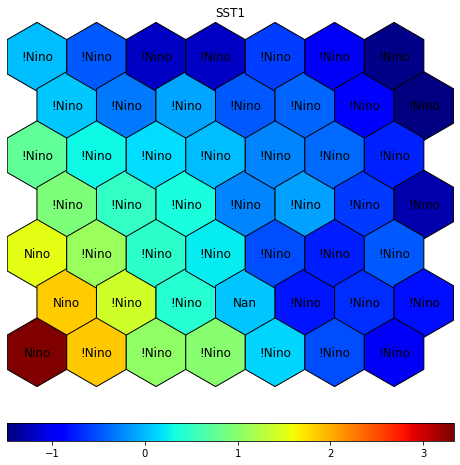

In [29]:
selec = int(np.where(masque==1)[0][0]) # on affiche la carte de la 1ere donnee apprise
view2D  = View2D(8,8,"El nino",text_size=10) ;
view2D.show(sm, neuronLabels=sm.node_labels,anotate=True, col_sz=1, which_dim=selec, denormalize=True,labelsize=12) ; 

#### Classification Ascendante Hiérarchique

- **Affichage du dendrogramme des référents**

Pour pouvoir spécifier la classification hiérarchique souhaitée.
Il faudra s'intéresser aux fonctions [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) et [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) du module [scipy](https://docs.scipy.org/doc/scipy/reference/index.html). 
On pourra modifier ponctuellement l'appel de ses fonctions au sein du fichier [dendrogram.py](./sompyLatmos/dendrogram.py)

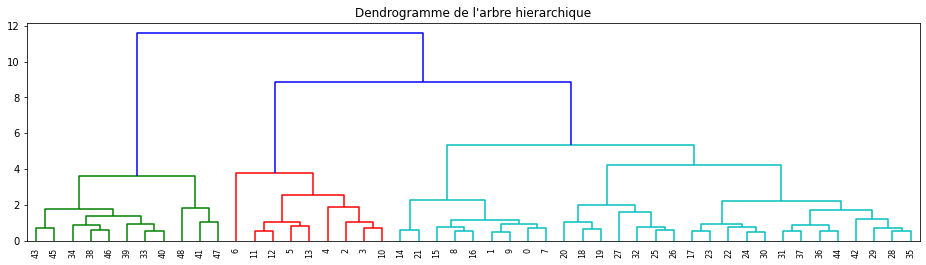

In [30]:
if True:
    from dendrogram import DendrogramView
    dendrogram = DendrogramView(16,4,"Dendrogramme de l'arbre hierarchique", text_size = 10)
    dendrogram.show(sm)
else: # la même chose (a priori) mais à la main
    plt.figure(figsize=(16,4))
    # on se limite aux variables apprises
    selec_mask = np.where(masque==1)[0]  # indice des donnees apprises
    Z = linkage(sm.codebook.matrix[:,selec_mask],'ward','euclidean')
    dendrogram(Z,sm.codebook.nnodes,'lastp') ; #,orientation='right') ;

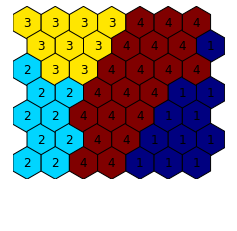

In [31]:
ndDeClasse_hac = 3 # nombre de classes choisie à la main
ndDeClasse_hac = 4 # nombre de classes choisie à la main
from hitmap import HitMapView
if True: # aggrege les classes via la CAH
    selec_mask = np.where(masque==1)[0]  
    Z = linkage(sm.codebook.matrix[:,selec_mask],'ward','euclidean')
    sm.cluster_labels = fcluster(Z, t=ndDeClasse_hac, criterion= 'maxclust')
    labels_hac = fcluster(Z, t=ndDeClasse_hac, criterion= 'maxclust').astype(str)
else: # a priori aggrege les neurones via l'algo des Kmeans
    sm.cluster(ndDeClasse_hac)
hits  = HitMapView(4,4,"Clustering",text_size=10)
a=hits.show(sm,labelsize=12)

<Figure size 432x288 with 0 Axes>

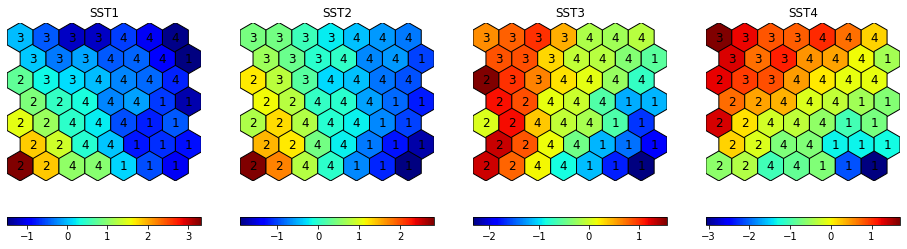

In [32]:
try :
    view2D  = View2D(16,10,
                 "El nino",
                 text_size=10) ;
    view2D.show(sm, neuronLabels=labels_hac,anotate=True, col_sz=leNombreDesDimension, which_dim=lesDimensions, denormalize=True, labelsize=12) ; 
except NameError as e:
    if str(e) == "name 'labels_hac' is not defined":
        print('Etiquette non generee (voir plus haut)')
    else:
        print('???')
        

**En cas de besoin pour afficher les indices des neurones**

In [33]:
if False:
    view2D  = View2D(16,10,
                 "El nino",
                 text_size=10) ;
    view2D.show(sm, neuronLabels=None,anotate=True, col_sz=leNombreDesDimension, which_dim=lesDimensions, denormalize=True, labelsize=12) ; 

#### Un peu de supervisé (pas toujours possible)
Comme les données sont associées à des classes, nous allons en profiter pour voir la correspondance entre les classes issues de la carte (déduites uniquement des entrées de la carte) et celles fournies avec les données.    
**On rappelle qu'il s'agit d'un algorithme non supervisé.**    
Ainsi, on ne prend pas en compte les classes lors de l'apprentissage.    
**On cherche donc à évaluer la capacité de la carte à discriminer ces classes. Cela ne pourra être fait que si les données des différentes classes sont bien distinctes dans l'espace des données (i.e. les entrées de la carte).** 

**Détermination des indices des classes estimées et désirées**

On ajoute la classe de rejet

In [34]:
classnames_ = classnames
classnames_.append('Nan')
classnames_ = np.array(classnames_)
classnames_

array(['!Nino', 'Nino', 'Nan'], dtype='<U5')

Détermination des indices des classes désirées

In [35]:
_, classes_desirees = np.where(data_labels[:,None]==np.array(classnames)[None,:])
#classes_desirees

Par précaution, on recalcule les etiquettes des neurones

In [36]:
# classes esimees
data_labels_estim = neuron_labels[sm._bmu[0].astype(int)]
_, classes_estimees = np.where(data_labels_estim[:,None]==np.array(classnames)[None,:])
#classes_estimees

**Matrice de confusion**

In [37]:
classes_desirees

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
classes_estimees

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

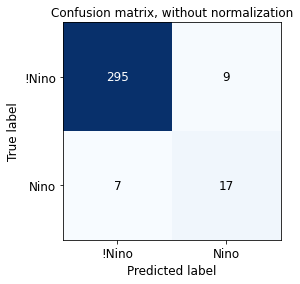

In [39]:
plt.figure(figsize=(4,4)) 
plot_confusion_matrix(classes_desirees, classes_estimees, classnames_,
                          title='', fontsize=12) ;